# Static Plotting Libraries for Python

In [1]:
# imports
import numpy as np
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt   # conda install matplotlib

# seaborn
import seaborn as sns   # conda install seaborn

### matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

https://matplotlib.org/stable/api/index

In [2]:
# figure: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
fig = plt.figure()
print(type(fig))

<class 'matplotlib.figure.Figure'>


<Figure size 432x288 with 0 Axes>

<class 'matplotlib.axes._subplots.AxesSubplot'>


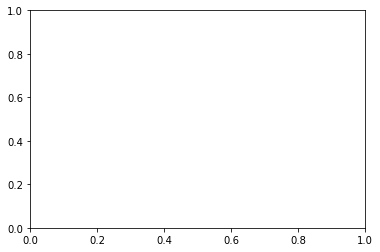

In [3]:
# axes: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html?highlight=pyplot%20axes#matplotlib.pyplot.axes
ax = plt.axes()
print(type(ax))

In [4]:
# axes attributes
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

---

In [5]:
# let's create some data
def random_data_generator(array, low, high):
    return np.random.randint(low, high, len(array))

# abscissa axes 
x_cat = ['Antivaccinists', 'Flat Earthers', '9/11 Deniers', 'Moon Landing Deniers', 'CR7 Fans']
x_time = ['2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']
x = np.random.randint(0, 100, 10)

# ordinate axes
y_cat = random_data_generator(x_cat, 10000, 100000)
y_cat_mean = y_cat.mean()
y_time = random_data_generator(x_time, 0, 100)
y = random_data_generator(x, 0, 1000)

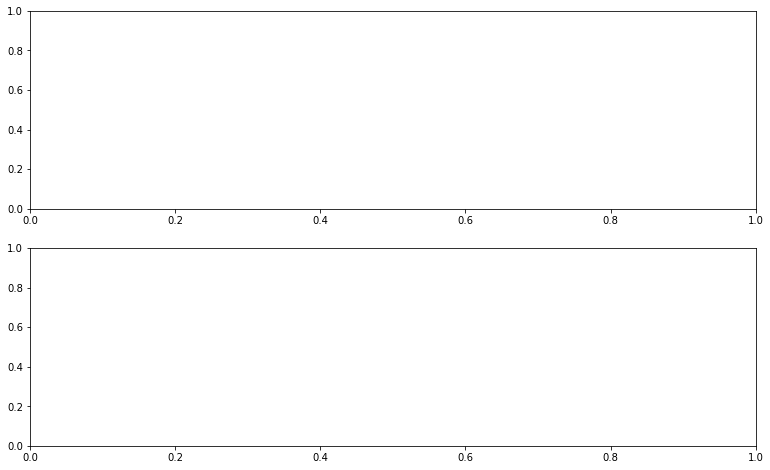

In [62]:
fig_test, (ax_test1, ax_test2) = plt.subplots(ncols=1, nrows=2, figsize=(13,8))


---

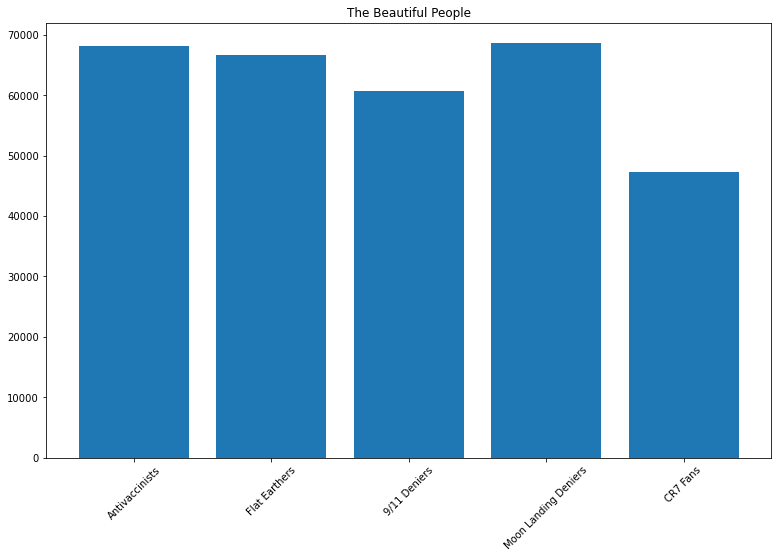

In [56]:
# subplots method (1 plot): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13,8))
ax.bar(x_cat, y_cat)                    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
ax.set_title('The Beautiful People')    # https://matplotlib.org/stable/api/axes_api.html
ax.xaxis.set_tick_params(rotation=45)   # https://matplotlib.org/stable/api/axis_api.html
plt.show();

---

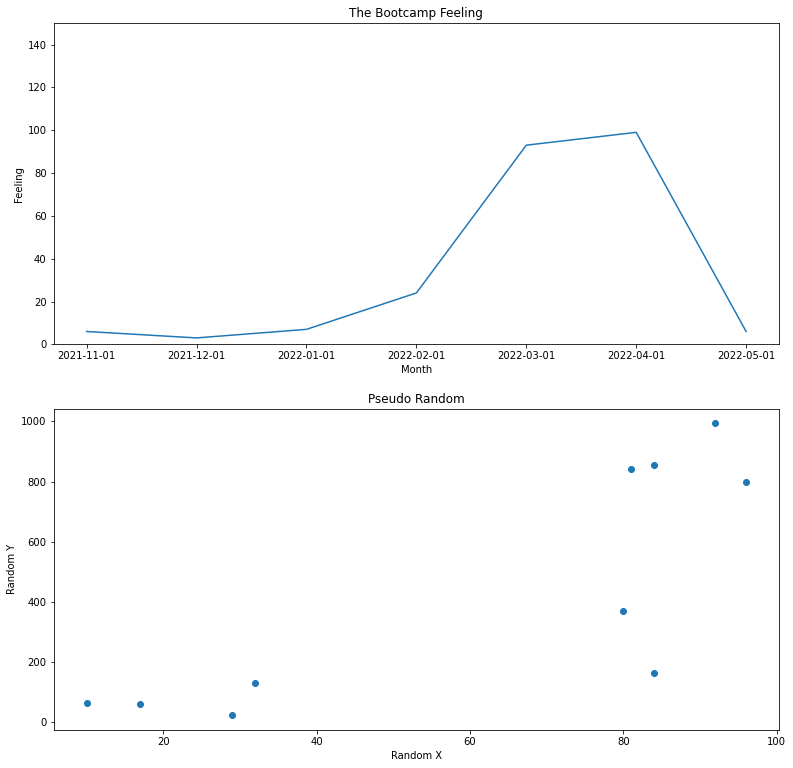

In [11]:
# subplots method (n plots)
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(13,13))
axs[0].plot(x_time, y_time)                    
axs[0].set(ylim=[0, 150], xlabel='Month', ylabel='Feeling', title='The Bootcamp Feeling')
axs[1].scatter(x, y)                    
axs[1].set(xlabel='Random X', ylabel='Random Y', title='Pseudo Random')
plt.show();

---

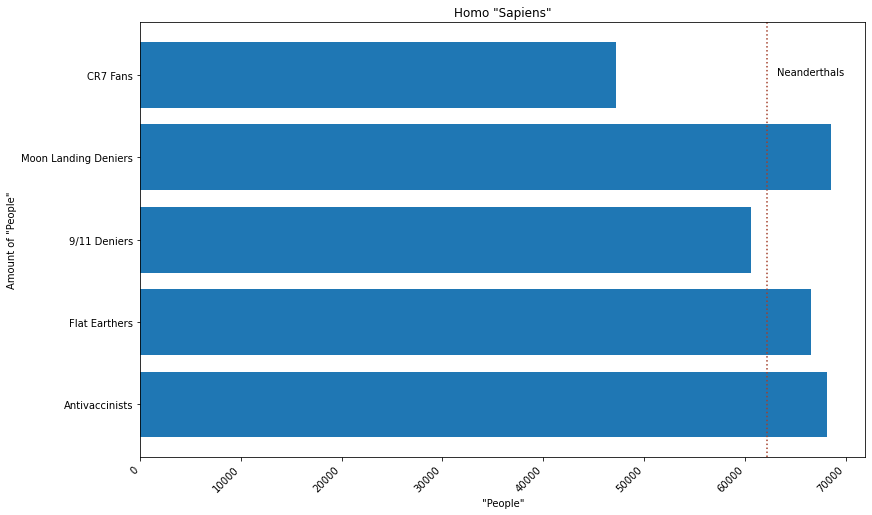

In [61]:
# more configuration examples
fig, ax = plt.subplots(figsize=(13, 8))
ax.barh(x_cat, y_cat)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='"People"', ylabel='Amount of "People"', title='Homo "Sapiens"')
ax.axvline(y_cat_mean, ls=':', color='#a2402b')
ax.text(y_cat_mean + 1000, 4, 'Neanderthals')
ax.title.set(y=1.05)
plt.show();

In [66]:
# set style
print(plt.style.available)
#plt.style.use('default')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [67]:
# save plot
fig.canvas.get_supported_filetypes()
#fig.savefig('./img/homo_sapiens.pdf', transparent=False, dpi=80, bbox_inches="tight")

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

---

### seaborn

It provides a high-level interface for drawing attractive and informative statistical graphics.

https://seaborn.pydata.org/api.html

In [68]:
# library example
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


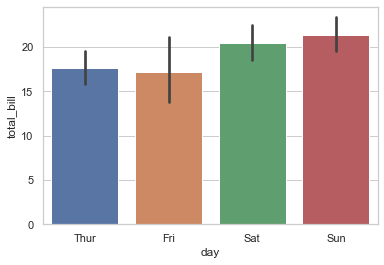

In [69]:
ax = sns.barplot(x="day", y="total_bill", data=tips)

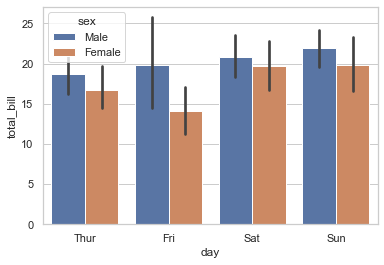

In [70]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

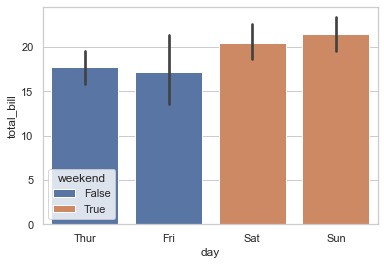

In [71]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
ax = sns.barplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False)

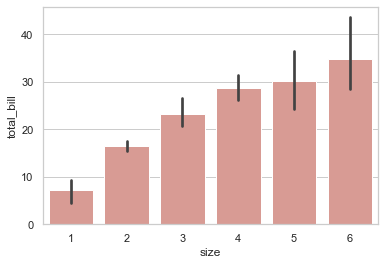

In [72]:
ax = sns.barplot(x="size", y="total_bill", data=tips, color="salmon", saturation=.5)

---

In [73]:
# our data
homo_sapiens = pd.DataFrame({'x_cat': x_cat, 'y_cat': y_cat})
homo_sapiens

,x_cat,y_cat
0,Antivaccinists,68176
1,Flat Earthers,66564
2,9/11 Deniers,60652
3,Moon Landing Deniers,68553
4,CR7 Fans,47246


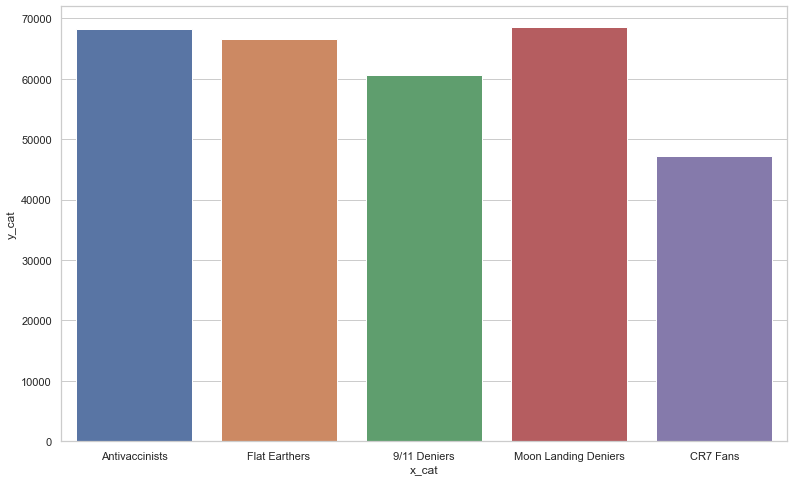

In [74]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13,8))
ax = sns.barplot(data=homo_sapiens, x='x_cat', y='y_cat')